# 데이터 재구조화(pivot)

*종류 : `pivot_table`, `stack`/`unstack`, `melt`, `crosstab` 등*

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Series의 재구조화

In [2]:
seri = pd.Series([0,1,2,3,4])
seri

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [3]:
seri[:3]

0    0
1    1
2    2
dtype: int64

In [4]:
#seri의 평균보다 크거나 같은 값들만 추출
seri[seri>=seri.mean()]

2    2
3    3
4    4
dtype: int64

In [5]:
# 행인덱스가 a~e, 데이터가 0~4까지의 값을 갖는 시리즈 생성
pd.Series([0,1,2,3,4], index=['a','b','c','d','e'])
seri = pd.Series(range(5), index=list('abcde'))
seri

a    0
b    1
c    2
d    3
e    4
dtype: int64

In [6]:
# b,d 행 값을 참소하시오
seri.loc[['b', 'd']]
seri.get(['b', 'd'])

b    1
d    3
dtype: int64

In [7]:
# 'c'인덱스가 seri에 들어있는지 확인?
'c' in seri

True

## 2. DataFrame 재구조화

### 2-1. `crosstab`

#### - 교차표 (싱글인덱스) : `crosstab(행인덱스, 컬럼인덱스)`

In [8]:
data = pd.DataFrame({"id":["id1","id1","id1","id2","id2","id1",],
             'f1':["a","a","a","b","b","b"],
             'f2':['d','d','d','c','c','d',]})
data

,id,f1,f2
0,id1,a,d
1,id1,a,d
2,id1,a,d
3,id2,b,c
4,id2,b,c
5,id1,b,d


In [9]:
pd.crosstab(data.f1, data.f2)

f2,c,d
f1,,
a,0,3
b,2,1


In [10]:
pd.crosstab(data.id, data.f1)

f1,a,b
id,,
id1,3,1
id2,0,2


In [11]:
pd.crosstab(data.id, data.f2)

f2,c,d
id,,
id1,0,4
id2,2,0


#### - 다중인덱스 : 다중레벨로 교차표 생성

In [12]:
pd.crosstab(data.id, [data.f1, data.f2])

f1   a  b   
f2   d  c  d
id          
id1  3  0  1
id2  0  2  0

In [13]:
#인덱스명, 컬럼명 지정
pd.crosstab(data.id, [data.f1, data.f2], rownames=['id_num'], colnames=['col1', 'col2'])

col1    a  b   
col2    d  c  d
id_num         
id1     3  0  1
id2     0  2  0

In [14]:
pd.crosstab(data.id, [data.f1, data.f2], margins=True)

f1   a  b    All
f2   d  c  d    
id              
id1  3  0  1   4
id2  0  2  0   2
All  3  2  1   6

In [15]:
#전체 중 구성비율
pd.crosstab(data.id, [data.f1, data.f2], normalize=True)

f1     a         b          
f2     d         c         d
id                          
id1  0.5  0.000000  0.166667
id2  0.0  0.333333  0.000000

### 2-2. 데이터프레임 연산

In [16]:
df = pd.DataFrame({
    'c1': [1,2,3,4],
    'c2': [4,5,6,7],
    'c3':[8,9,10, np.nan]},
    index=['r1','r2,','r3','r4']
)
df

,c1,c2,c3
r1,1,4,8.0
"r2,",2,5,9.0
r3,3,6,10.0
r4,4,7,NaN


In [17]:
print(df.index)
print(df.columns)

Index(['r1', 'r2,', 'r3', 'r4'], dtype='object')
Index(['c1', 'c2', 'c3'], dtype='object')


In [18]:
#df에서 r1, r3를 추출하여 새로운 데이터프레임 생성
pd.DataFrame(df.loc[['r1', 'r3']])
df_r1r3 = pd.DataFrame(df, index=['r1', 'r3'])
df_c1c3 = pd.DataFrame(df, columns=['c1', 'c3'])

In [19]:
#df에서 행:r1,r3, 열:c1,c3 추출 -> 데이터프레임 생성
pd.DataFrame(df, index=['r1', 'r3'], columns=['c1', 'c3'])

,c1,c3
r1,1,8.0
r3,3,10.0


In [20]:
#df에 c4열 추가 : c1*c2

#방법1
df['c4'] = df['c1']*df['c2']

#방법2
df = df.assign(c5 = df['c1']*df['c2'])

#방법3
df = df.assign(c6 = lambda x: x.c1*x.c2)#x에는 데이터프레임(df)이 전달됌

df

,c1,c2,c3,c4,c5,c6
r1,1,4,8.0,4,4,4
"r2,",2,5,9.0,10,10,10
r3,3,6,10.0,18,18,18
r4,4,7,NaN,28,28,28


### 2-3. 데이터 제거
`drop()`, `del` : 데이터프레임 컬럼 제거

#### - `drop`: 원본 데이터프레임에서는 제거되지 않음

In [21]:
df_new = df.drop(['c4', 'c5', 'c6'], axis=1)
df_new

,c1,c2,c3
r1,1,4,8.0
"r2,",2,5,9.0
r3,3,6,10.0
r4,4,7,NaN


In [22]:
df

,c1,c2,c3,c4,c5,c6
r1,1,4,8.0,4,4,4
"r2,",2,5,9.0,10,10,10
r3,3,6,10.0,18,18,18
r4,4,7,NaN,28,28,28


#### - `del` : 원본 데이터프레임에서 해당 컬럼 제거

In [23]:
del df['c4']

In [24]:
df

,c1,c2,c3,c5,c6
r1,1,4,8.0,4,4
"r2,",2,5,9.0,10,10
r3,3,6,10.0,18,18
r4,4,7,NaN,28,28


## Numpy(배열) 재구조화

### 3-1. `array` vs `asarray`

- 공통점 : 배열생성
- 다른점 :
    * array : copy=true가 기본
    * asarray : copy=false가 기본  
         - 즉, 옵션을 명시하지 않으면 array는 복사본을 만들어서 저장하고, asarray는 복사본없이 저장.  
         - 하지만 다른 type을 convert하기 위해서 사용하는 경우(예를 들면 list를 입력으로 주어서 ndarray로 만드는 경우)는 형변환을 위해서 새로운 구조를 반드시 만들어야 하기에 copy=False가 무시된다(asarray()인 경우에도) -> type을 convert하는 경우는 asarray와 array가 동일하게 동작
         - asarray()는 이미 ndarray가 메모리에 있다면 새로 생성하지 않고, 기존에 메모리에 있는 ndarray를 재사용

In [25]:
c=np.array([1,2], dtype=np.float32)
c

array([1., 2.], dtype=float32)

In [26]:
np.asarray(c, dtype=np.float32) is c #데이터형이 같으므로 복사되지 않음 #메모리 상에서 같은 주소냐?

True

In [27]:
np.asarray(c, dtype=np.float64) is c #데이터형이 다르므로 복사 #메모리 상에서 다른 주소에 복사됨 

False

### 3-2. 행렬

- 요소 자동완성 함수 : `np.zeros()`, `np.ones()`, `np.empty()`  
- 단위행렬 생성 함수 : `np.eye()`, `np.identity()`

In [28]:
f = np.arange(10)
f25 = f.reshape(2,5)
print(np.zeros_like(f25)) #특정 변수의 구조 형태와 똑같은 구조로 요소가 모두 0인 배열을 생성
print(np.ones_like(f25))

[[0 0 0 0 0]
 [0 0 0 0 0]]
[[1 1 1 1 1]
 [1 1 1 1 1]]


In [29]:
print(np.eye(5))
print(np.identity(5))

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


### 3-3. 배열 간 비교연산

In [30]:
x = np.array([1,1,2,2])
y = np.array([1,2,3,4])

In [31]:
#x와 y값이 같냐?
np.equal(x, y)

array([ True, False, False, False])

In [32]:
#x와 y값이 크냐?
np.greater(x, y)

array([False, False, False, False])

In [33]:
#x와 y값이 크거나 같냐?
np.greater_equal(x, y)

array([ True, False, False, False])

In [34]:
#x와 y값이 작냐?
np.less(x, y)

array([False,  True,  True,  True])

In [35]:
#x와 y값이 작거나 같냐?
np.less_equal(x, y)

array([ True,  True,  True,  True])

In [36]:
#x와 y의 배열이 같냐?
np.array_equal(x, y)

False

### 3-4. 배열 간 논리연산

In [37]:
a = np.array([1,1,0,0])
b = np.array([1,0,1,0])

In [38]:
np.logical_and(a, b)

array([ True, False, False, False])

In [39]:
np.logical_or(a, b)

array([ True,  True,  True, False])

In [40]:
np.logical_xor(a, b)

array([False,  True,  True, False])

### 3-5. `astype` 
데이터 타입 재구조화를 위한 형변환함수
- 숫자형 : bool, 정수(int), 부동소수점(float), 복소수(complex)
- 문자형 : string, object

In [41]:
x64 = np.array([1.5, 2.4, 3.7], dtype=np.float64) #np.float64([1.5, 2.4, 3.7])와 같음
x64.dtype

dtype('float64')

In [42]:
x64.astype(np.int64)

array([1, 2, 3], dtype=int64)

In [43]:
x64.astype(np.string_)

array([b'1.5', b'2.4', b'3.7'], dtype='|S32')

Slicing

In [44]:
arr = np.arange(20).reshape(5,4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [45]:
abc = np.array(list('aacde'))
abc

array(['a', 'a', 'c', 'd', 'e'], dtype='<U1')

In [46]:
arr[abc=='a']

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [47]:
arr[abc=='a', :2]

array([[0, 1],
       [4, 5]])

In [48]:
arr[abc!='a']

array([[ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [49]:
arr[~(abc=='a')] # ~ : not

array([[ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [50]:
# 8이상 15이하인 경우는 모두 10으로 변경
arr[(arr>=8) & (arr<=15)] = 10
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [10, 10, 10, 10],
       [10, 10, 10, 10],
       [16, 17, 18, 19]])

### 3-6. 올림, 내림, 반올림

In [51]:
a = np.array([-4.62, -2.19, 1.57, 3.4, 0])

In [52]:
np.trunc(a) #정수만 남김

array([-4., -2.,  1.,  3.,  0.])

In [53]:
np.floor(a) #가장 가까운  작은 정수로 내림

array([-5., -3.,  1.,  3.,  0.])

In [54]:
np.ceil(a) #가장 가까운 큰 정수로 올림

array([-4., -2.,  2.,  4.,  0.])

### 3-7. 배열 간 사칙연산

In [55]:
b = np.array([1,2,3,4]) #1차원
c = np.array([[1,2,], [3,4]]) #2차원
d = np.array([[1,2],[3,np.nan]]) #null값을 포함한 2차원

#### - 곱셈

* 1차원

In [56]:
# 1차원

np.prod(b) #배열 요소간 곱셈

24

* 2차원

In [57]:
# 2차원

print(np.prod(c)) #전체 곱셈 결과
print(np.prod(c, axis=0)) #위아래 곱셈
print(np.prod(c, axis=1)) #좌우 곱셈

24
[3 8]
[ 2 12]


* null값을 포함한 배열

In [58]:
print(np.prod(d, axis=0))
print(np.nanprod(d, axis=0)) #nan을 1로 취급하여 곱셈

[ 3. nan]
[3. 2.]


#### - 덧셈

* 1차원

In [59]:
print(np.sum(b)) #모든 요소들의 합 : b(1차원배열)-> sum() -> 10(0차원배열)
print(np.sum(b, keepdims=True)) #sum연산 후에서 차원 유지

10
[10]


* 2차원

In [60]:
print(np.sum(c, axis=0)) #위아래 합계
print(np.sum(c, axis=1)) #좌우 합계

[4 6]
[3 7]


* null값을 포함한 배열

In [61]:
# 덧셈
print(np.sum(d, axis=0))
print(np.nansum(d, axis=0)) #nan을 0으로 취급하여 덧셈

[ 4. nan]
[4. 2.]


In [62]:

d

array([[ 1.,  2.],
       [ 3., nan]])

#### - 누적합

In [63]:
e=np.array([1,2,3,4])
f = np.arange(6).reshape(2,3)

* 1차원

In [64]:
np.cumsum(e)

array([ 1,  3,  6, 10], dtype=int32)

* 2 차원

In [65]:
print(np.cumsum(f))
print(np.cumsum(f, axis=0))
print(np.cumsum(f, axis=1))

[ 0  1  3  6 10 15]
[[0 1 2]
 [3 5 7]]
[[ 0  1  3]
 [ 3  7 12]]


#### - 차분 : 요소 간의 차이

In [66]:
g = np.array([1,2,4,10,13,20])

In [67]:
#1차 차분 : 요소 간의 차이를 출력
np.diff(g)

array([1, 2, 6, 3, 7])

In [68]:
#2차 차분 : 1차 차분한 결과에 대한 차분
np.diff(g, 2)

array([ 1,  4, -3,  4])

### 3-8. 지수함수&로그함수

- cost function, soft max, 
- 정규분포로 변환(로그변환)
- 로그변환 : 오른쪽으로 크게 치우져진 멱함수 분포를 -> 정규분포로 변환
- 멱함수(power law)?한 수가 다른 수의 거듭제곱으로 표현되는 두 수의 함수적 관계

#### - 지수함수

In [69]:
#np.exp() #밑(base)이  자연상수e인 지수함수로 변환 (y=e의 x승)
x=np.array([0.000000001, 1, 2, 4, 10, 100])

np.exp(x)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 5.45981500e+01,
       2.20264658e+04, 2.68811714e+43])

#### - 로그함수

In [70]:
#지수함수의 역함수 -> 로그함수, 
#로그함수의 밑 자연상수(e), 10, 2

#로그함수의 밑 자연상수(e)
print(np.log(x))

#로그함수의 밑 10
print(np.log10(x))

#로그함수의 밑 2
print(np.log2(x))

[-20.72326584   0.           0.69314718   1.38629436   2.30258509
   4.60517019]
[-9.          0.          0.30103     0.60205999  1.          2.        ]
[-29.89735285   0.           1.           2.           3.32192809
   6.64385619]


### 3-9. 삼각함수

- 주기적인 파동 함수(주파수)에서 sin함수. 벡터 내적에서 cos함수, 퓨리에 변환
- degree?원을 360도로 표기
- radian? 부채꼴의 호의 길이와 반지름 길이가 같을때의 각도를 1radian
- 180도 = 파이 라디안
- 1도 =파이 라디안 / 180
- 1라디안 = 180도 / 파이 = 57.xx

---
※ __삼각함수의 역함수__
- 1/sin함수=csc함수
- 1/cos함수=sec함수
- 1/tan함수=cot함수
---

In [71]:
np.sin(np.array((0, 30, 45, 60, 90, 180, 270, 360))*np.pi/180)
np.cos(np.array((0, 30, 45, 60, 90, 180, 270, 360))*np.pi/180)
np.tan(np.array((0, 30, 45, 60, 90, 180, 270, 360))*np.pi/180)

array([ 0.00000000e+00,  5.77350269e-01,  1.00000000e+00,  1.73205081e+00,
        1.63312394e+16, -1.22464680e-16,  5.44374645e+15, -2.44929360e-16])

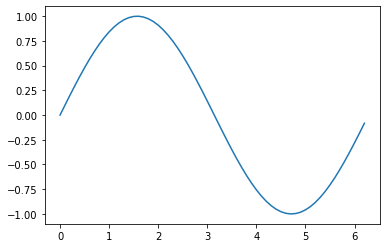

In [72]:
x=np.arange(0, 2*np.pi, 0.1)
y=np.sin(x)
plt.plot(x,y)

### 3-10. 절대값

In [73]:
x=np.array([-100, 1, 4])
np.abs(x)
np.fabs(x) #faster

array([100.,   1.,   4.])

### 3-11. `modf`
각 원소의 몫과 나머지를 리턴한다. 두 개의 ndarray를 리턴한다. 

---
※ `mod` : 첫 번째 배열에서 두 번째 배열을 나눈 나머지를 리턴한다.

---

In [74]:
x=np.array([3.5, 7.8, -10.1])
print(np.modf(x))
print(np.modf(x)[0])
print(np.modf(x)[1])

(array([ 0.5,  0.8, -0.1]), array([  3.,   7., -10.]))
[ 0.5  0.8 -0.1]
[  3.   7. -10.]


### 3-12. `sign`
각 원소의 부호를 계산함. 양수 : 1, 음수 : -1

In [75]:
np.sign(x) #양수:1, 음수:-1, 영:0

array([ 1.,  1., -1.])

### 3-13. 차원변형

#### - `reshape` : 1차원->다차원

In [76]:
x=np.arange(12).reshape(3,4)
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

#### - `ravel`, `flatten` : 다차원->1차원

In [77]:
np.ravel(x) 
np.ravel(x, order='C')#default : 첫번째 행부터 차례로 나열
np.ravel(x, order='f') #첫번째 열부터 차례로 나열

array([ 0,  4,  8,  1,  5,  9,  2,  6, 10,  3,  7, 11])

### 3-14. 두 배열의 연결

#### - 1차원

In [78]:
a=np.array([1,2,3])
b=np.array([4,5,6])

In [79]:
#두 배열을 좌우로 연결
np.r_[a,b]
np.hstack([a,b])
np.concatenate((a,b)) #default로 axis=0

array([1, 2, 3, 4, 5, 6])

In [80]:
#두 배열을 위아래로 연결
np.r_[[a],[b]] #a,b 를 []사용 -> 1차원 배열 -> 연결
np.vstack([a,b])
#np.concatenate((a,b), axis=1) 1차원 배열 연결 에러발생, 2차원 이상 사용 가능

array([[1, 2, 3],
       [4, 5, 6]])

#### - 2차원

In [81]:
a=np.array([[0,1],[2,3]])
b=np.array([[1,2],[3,4]])

In [82]:
#좌우 연결
np.concatenate((a,b), axis=1)
np.concatenate((a,b), axis=0)
np.c_[a,b]
np.column_stack([a,b])
np.concatenate((a.T,b.T), axis=1)

array([[0, 2, 1, 3],
       [1, 3, 2, 4]])

### 3-15. 정렬

- 데이터프레임 : `데이터프레임.sort_values()`
- 리스트 : `리스트.sort()`, `sorted(리스트)`

#### - 1차원

In [83]:
x=np.array([4,2,6,3,9,5,10])

In [84]:
np.sort(x) #정렬된 결과에 대한 복사본
x #x는 그대로 유지

array([ 4,  2,  6,  3,  9,  5, 10])

In [85]:
x.sort() #x자체적으로 정렬되어 저장
x #x도 변형

array([ 2,  3,  4,  5,  6,  9, 10])

In [86]:
#배열을 거꾸로 정렬하는 방법
x=np.array([4,2,6,3,9,5,10])
np.sort(x)[::-1]

array([10,  9,  6,  5,  4,  3,  2])

In [87]:
# argsort : 정렬할 때의 순서를 반환
print(x)

print(np.argsort(x))
print(x[np.argsort(x)])

print(np.argsort(-x)) #역순
print(x[np.argsort(-x)])

[ 4  2  6  3  9  5 10]
[1 3 0 5 2 4 6]
[ 2  3  4  5  6  9 10]
[6 4 2 5 0 3 1]
[10  9  6  5  4  3  2]


#### - 2차원

In [88]:
x=np.array([[2,1,6],
           [0,7,4],
           [5,3,2]])

In [89]:
np.sort(x) #axis=1 default

array([[1, 2, 6],
       [0, 4, 7],
       [2, 3, 5]])

In [90]:
np.sort(x, axis=1)

array([[1, 2, 6],
       [0, 4, 7],
       [2, 3, 5]])

In [91]:
np.sort(x, axis=0)

array([[0, 1, 2],
       [2, 3, 4],
       [5, 7, 6]])

In [92]:
np.sort(x, axis=0)[::-1]

array([[5, 7, 6],
       [2, 3, 4],
       [0, 1, 2]])